# Modeling - LSTM

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
#!pip install keras

In [64]:
#!pip install tensorflow

In [65]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

## Load training data

Load only training data which is between 2012 to 2016, convert to datatime format.

In [66]:
data = pd.read_csv('../data/interim/energy_weather_features_train.csv',index_col=0)
data.index = pd.DatetimeIndex(data.index).to_period('H')
data = data.sort_index()

In [67]:
data.head()

,energy,humidity,pressure,temperature,weather,wind_direction,wind_speed,weather_broken clouds,weather_drizzle,weather_few clouds,...,weather_proximity thunderstorm,weather_scattered clouds,weather_sky is clear,weather_snow,n_energy,n_humidity,n_pressure,n_temperature,n_wind_direction,n_wind_speed
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00,11426.0,71.0,1014.0,284.010000,overcast clouds,0.0,0.0,0,0,0,...,0,0,0,0,0.024997,0.681319,-0.546338,0.090982,0.0,-2.284797
2012-10-01 14:00,11522.0,70.0,1014.0,284.054691,overcast clouds,0.0,0.0,0,0,0,...,0,0,0,0,0.068698,0.670330,-0.546338,0.094994,0.0,-2.284797
2012-10-01 15:00,11574.0,70.0,1014.0,284.177412,overcast clouds,0.0,0.0,0,0,0,...,0,0,0,0,0.092369,0.670330,-0.546338,0.106013,0.0,-2.284797
2012-10-01 16:00,11489.0,70.0,1014.0,284.300133,overcast clouds,0.0,0.0,0,0,0,...,0,0,0,0,0.053676,0.670330,-0.546338,0.117033,0.0,-2.284797
2012-10-01 17:00,11309.0,69.0,1014.0,284.422855,overcast clouds,0.0,0.0,0,0,0,...,0,0,0,0,-0.028264,0.659341,-0.546338,0.128052,0.0,-2.284797


For labels, we'll use energy data that were normalized. The feature columns contain everything related to weather. The feautures have been normalized in the preprocessing steps.

In [68]:
df_energy = data[['n_energy']]

In [69]:
features = data.iloc[:,7:].drop(columns='n_energy',axis=1)

In [70]:
raw_data = df_energy.join(features)

In [100]:
raw_data

,n_energy,weather_broken clouds,weather_drizzle,weather_few clouds,weather_fog,weather_haze,weather_heavy intensity rain,weather_heavy snow,weather_light intensity drizzle,weather_light rain,...,weather_overcast clouds,weather_proximity thunderstorm,weather_scattered clouds,weather_sky is clear,weather_snow,n_humidity,n_pressure,n_temperature,n_wind_direction,n_wind_speed
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00,0.024997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.681319,-0.546338,0.090982,0.000000,-2.284797
2012-10-01 14:00,0.068698,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.670330,-0.546338,0.094994,0.000000,-2.284797
2012-10-01 15:00,0.092369,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.670330,-0.546338,0.106013,0.000000,-2.284797
2012-10-01 16:00,0.053676,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.670330,-0.546338,0.117033,0.000000,-2.284797
2012-10-01 17:00,-0.028264,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.659341,-0.546338,0.128052,0.000000,-2.284797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00,0.098287,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.659341,-1.343387,-0.595910,0.833333,1.008900
2016-12-31 20:00,0.080989,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.659341,-1.343387,-0.595910,0.833333,1.344177
2016-12-31 21:00,-0.044652,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.659341,-1.243756,-0.684802,0.833333,1.344177


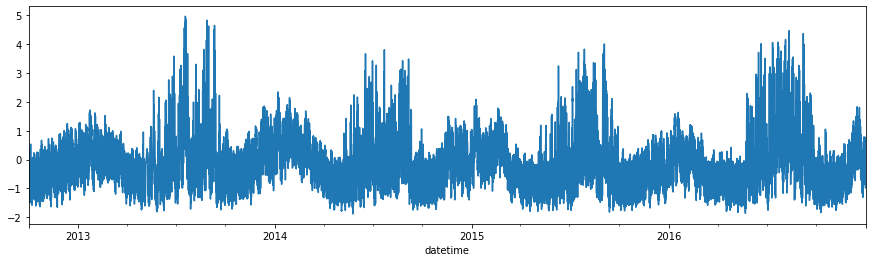

In [71]:
plt.figure(figsize=(15,4))
raw_data['n_energy'].plot()
plt.show()

## Load testing data

In [101]:
data_test = pd.read_csv('../data/interim/energy_weather_features_test.csv',index_col=0)
data_test.index = pd.DatetimeIndex(data_test.index).to_period('H')
data_test = data_test.sort_index()
df_energy_test = data_test[['n_energy']]
features_test = data_test.iloc[:,7:].drop(columns='n_energy',axis=1)
raw_data_test = df_energy_test.join(features_test)

In [102]:
raw_data_test

,n_energy,weather_broken clouds,weather_drizzle,weather_few clouds,weather_fog,weather_haze,weather_heavy intensity rain,weather_heavy snow,weather_light intensity drizzle,weather_light rain,...,weather_overcast clouds,weather_proximity thunderstorm,weather_scattered clouds,weather_sky is clear,weather_snow,n_humidity,n_pressure,n_temperature,n_wind_direction,n_wind_speed
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00,-0.396536,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1.000000,-0.845232,-0.802427,0.833333,0.240049
2017-01-01 01:00,-0.534467,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.450549,-0.845232,-0.902991,0.805556,0.240049
2017-01-01 02:00,-0.672854,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1.000000,-0.745601,-0.974823,0.750000,-0.215174
2017-01-01 03:00,-0.781651,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0.593407,-0.745601,-1.079877,0.694444,-0.215174
2017-01-01 04:00,-0.880434,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0.703297,-0.546338,-1.154403,0.611111,-1.393856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00,0.364135,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.472527,0.549604,-0.148757,0.166667,-0.744669
2017-11-29 21:00,0.285382,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0.615385,0.449972,-0.117331,0.111111,0.240049
2017-11-29 22:00,0.141078,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.956044,0.449972,-0.173000,0.194444,-0.744669


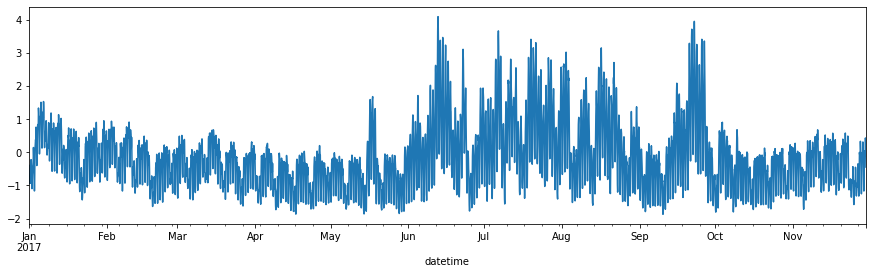

In [73]:
plt.figure(figsize=(15,4))
raw_data_test['n_energy'].plot()
plt.show()

# LSTM model

The data must be transformed to different lags. Here we'll limit our data to 5 lags, which is similar to our ARIMA parameters.

In [74]:
lag1 = raw_data.shift(periods=1)
lag2 = raw_data.shift(periods=2)
lag3 = raw_data.shift(periods=3)
lag4 = raw_data.shift(periods=4)
lag5 = raw_data.shift(periods=5)

In [75]:
df_lags = raw_data.join(lag1,how='left',rsuffix='_lag1').join(lag2,how='left',rsuffix='_lag2').join(lag3,how='left',rsuffix='_lag3').join(lag4,how='left',rsuffix='_lag4').join(lag5,how='left',rsuffix='_lag5')

In [76]:
df_lags = df_lags.dropna()

In [77]:
df_lags

,n_energy,weather_broken clouds,weather_drizzle,weather_few clouds,weather_fog,weather_haze,weather_heavy intensity rain,weather_heavy snow,weather_light intensity drizzle,weather_light rain,...,weather_overcast clouds_lag5,weather_proximity thunderstorm_lag5,weather_scattered clouds_lag5,weather_sky is clear_lag5,weather_snow_lag5,n_humidity_lag5,n_pressure_lag5,n_temperature_lag5,n_wind_direction_lag5,n_wind_speed_lag5
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 18:00,-0.089718,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.681319,-0.546338,0.090982,0.000000,-2.284797
2012-10-01 19:00,-0.131598,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.670330,-0.546338,0.094994,0.000000,-2.284797
2012-10-01 20:00,0.011340,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.670330,-0.546338,0.106013,0.000000,-2.284797
2012-10-01 21:00,0.154279,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.670330,-0.546338,0.117033,0.000000,-2.284797
2012-10-01 22:00,0.016348,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.659341,-0.546338,0.128052,0.000000,-2.284797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00,0.098287,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.604396,-1.741911,-0.574361,0.638889,1.344177
2016-12-31 20:00,0.080989,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.428571,-1.741911,-0.578850,0.666667,1.008900
2016-12-31 21:00,-0.044652,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.351648,-1.642280,-0.571667,0.611111,1.008900


The first model simply relies on energy data and their lags. No other features are included. Here, we'll only use year 2013 as the training data.

In [78]:
df_lags_2013 = df_lags['2013']
y_train = df_lags_2013[['n_energy']].to_numpy()
X_train = df_lags_2013[['n_energy_lag1','n_energy_lag2','n_energy_lag3','n_energy_lag4','n_energy_lag5']].to_numpy()
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

In [79]:
X_train.shape

(8100, 1, 5)

In [80]:
model1 = Sequential()
model1.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(Dense(1))
model1.compile(loss='mse', optimizer='adam')

In [81]:
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=10, verbose='auto', shuffle=False)

Epoch 1/100
810/810 [==============================] - 5s 3ms/step - loss: 0.0713
Epoch 2/100
810/810 [==============================] - 3s 3ms/step - loss: 0.0295A: 0s - loss: 0
Epoch 3/100
810/810 [==============================] - 3s 3ms/step - loss: 0.0251
Epoch 4/100
810/810 [==============================] - 4s 5ms/step - loss: 0.0239
Epoch 5/100
810/810 [==============================] - 3s 3ms/step - loss: 0.0232
Epoch 6/100
810/810 [==============================] - 3s 3ms/step - loss: 0.0228
Epoch 7/100
810/810 [==============================] - 3s 4ms/step - loss: 0.0225
Epoch 8/100
810/810 [==============================] - 3s 4ms/step - loss: 0.0223
Epoch 9/100
810/810 [==============================] - 3s 4ms/step - loss: 0.0221
Epoch 10/100
810/810 [==============================] - 3s 3ms/step - loss: 0.0220
Epoch 11/100
810/810 [==============================] - 3s 3ms/step - loss: 0.0219
Epoch 12/100
810/810 [==============================] - 3s 3ms/step - loss: 0.021

810/810 [==============================] - 3s 3ms/step - loss: 0.0162
Epoch 100/100
810/810 [==============================] - 2s 3ms/step - loss: 0.0162


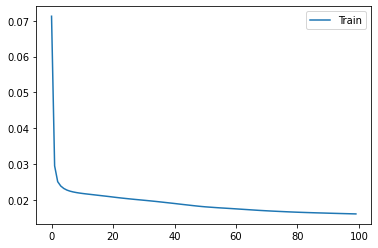

In [82]:
plt.plot(history1.history['loss'], label='Train')
plt.legend()
plt.show()

In [83]:
model1.save('../models/my_lstm')

INFO:tensorflow:Assets written to: ../models/my_lstm/assets


INFO:tensorflow:Assets written to: ../models/my_lstm/assets


Increasing the epoch could further decreases loss, however, it could also overfit.

# LSTM model + features

In the second model, we'll include temperature from the weather data and their associated lags.

In [84]:
df_lags_2013 = df_lags['2013']
y_train = df_lags_2013[['n_energy']].to_numpy()
X_train = df_lags_2013[['n_energy_lag1','n_energy_lag2','n_energy_lag3','n_energy_lag4','n_energy_lag5','n_temperature_lag1','n_temperature_lag2','n_temperature_lag3','n_temperature_lag4','n_temperature_lag5']].to_numpy()
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

In [85]:
X_train.shape

(8100, 1, 10)

In [86]:
model2 = Sequential()
model2.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(Dense(1))
model2.compile(loss='mse', optimizer='adam')

In [87]:
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=10, verbose='auto', shuffle=False)

Epoch 1/100
810/810 [==============================] - 5s 3ms/step - loss: 0.0864
Epoch 2/100
810/810 [==============================] - 2s 3ms/step - loss: 0.0385
Epoch 3/100
810/810 [==============================] - 2s 3ms/step - loss: 0.0305
Epoch 4/100
810/810 [==============================] - 2s 3ms/step - loss: 0.0277
Epoch 5/100
810/810 [==============================] - 2s 3ms/step - loss: 0.0266
Epoch 6/100
810/810 [==============================] - 2s 3ms/step - loss: 0.0259
Epoch 7/100
810/810 [==============================] - 2s 3ms/step - loss: 0.0254
Epoch 8/100
810/810 [==============================] - 2s 3ms/step - loss: 0.0249
Epoch 9/100
810/810 [==============================] - 2s 3ms/step - loss: 0.0245
Epoch 10/100
810/810 [==============================] - 2s 3ms/step - loss: 0.0242
Epoch 11/100
810/810 [==============================] - 2s 3ms/step - loss: 0.0239
Epoch 12/100
810/810 [==============================] - 2s 3ms/step - loss: 0.0237
Epoch 13/100


810/810 [==============================] - 2s 3ms/step - loss: 0.0161
Epoch 100/100
810/810 [==============================] - 2s 3ms/step - loss: 0.0160


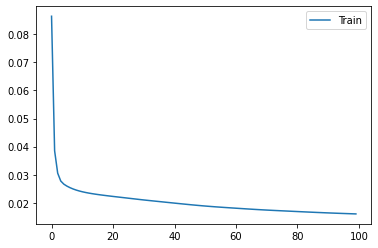

In [124]:
plt.plot(history2.history['loss'], label='Train')
plt.legend()
plt.show()

In [89]:
model2.save('../models/my_lstm_x')

INFO:tensorflow:Assets written to: ../models/my_lstm_x/assets


INFO:tensorflow:Assets written to: ../models/my_lstm_x/assets


The loss versus epoch curve appear to reach the plateau with 50 epochs.

# Forecast - LSTM

In [103]:
from sklearn.metrics import mean_squared_error

In [104]:
lag1 = raw_data_test.shift(periods=1)
lag2 = raw_data_test.shift(periods=2)
lag3 = raw_data_test.shift(periods=3)
lag4 = raw_data_test.shift(periods=4)
lag5 = raw_data_test.shift(periods=5)
df_lags_test = raw_data_test.join(lag1,how='left',rsuffix='_lag1').join(lag2,how='left',rsuffix='_lag2').join(lag3,how='left',rsuffix='_lag3').join(lag4,how='left',rsuffix='_lag4').join(lag5,how='left',rsuffix='_lag5')
df_lags_test = df_lags_test.dropna()

In [107]:
df_lags_test.columns

Index(['n_energy', 'weather_broken clouds', 'weather_drizzle',
       'weather_few clouds', 'weather_fog', 'weather_haze',
       'weather_heavy intensity rain', 'weather_heavy snow',
       'weather_light intensity drizzle', 'weather_light rain',
       ...
       'weather_overcast clouds_lag5', 'weather_proximity thunderstorm_lag5',
       'weather_scattered clouds_lag5', 'weather_sky is clear_lag5',
       'weather_snow_lag5', 'n_humidity_lag5', 'n_pressure_lag5',
       'n_temperature_lag5', 'n_wind_direction_lag5', 'n_wind_speed_lag5'],
      dtype='object', length=144)

## LSTM

Here we can try to forcast the energy consumption for the year 2017 using model 1 (without features).

In [138]:
y_test = df_lags_test[['n_energy']].to_numpy()
X_test = df_lags_test[['n_energy_lag1','n_energy_lag2','n_energy_lag3','n_energy_lag4','n_energy_lag5']].to_numpy()
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [139]:
testPredict1 = model1.predict(X_test)

Use mean and standard deviation to convert the normalized data to real unit. These values are from the previous scaling step.

In [140]:
mymean = 11371.08805763
mystd = 2196.74458408

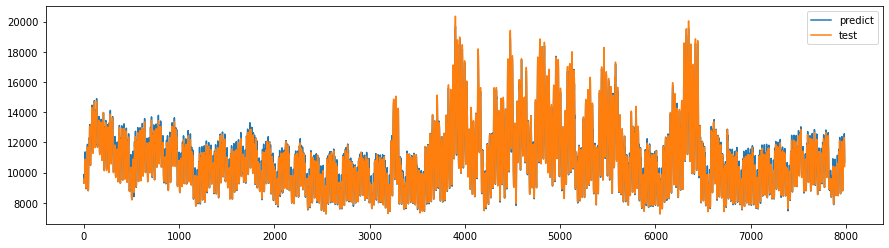

In [148]:
plt.figure(figsize=(15,4))
plt.plot(testPredict1*mystd+mymean,label='predict')
plt.plot(y_test*mystd+mymean,label='test')
plt.legend()
plt.show()

In [142]:
rmse = np.sqrt(mean_squared_error(y_test*mystd+mymean, trainPredict1*mystd+mymean))
print(rmse)

210.9281423944121


## LSTM with features

Here we can try to forcast the energy consumption for the year 2017 using model 2 (with features).

In [143]:
y_test = df_lags_test[['n_energy']].to_numpy()
X_test = df_lags_test[['n_energy_lag1','n_energy_lag2','n_energy_lag3','n_energy_lag4','n_energy_lag5','n_temperature_lag1','n_temperature_lag2','n_temperature_lag3','n_temperature_lag4','n_temperature_lag5']].to_numpy()
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [144]:
testPredict2 = model2.predict(X_test)

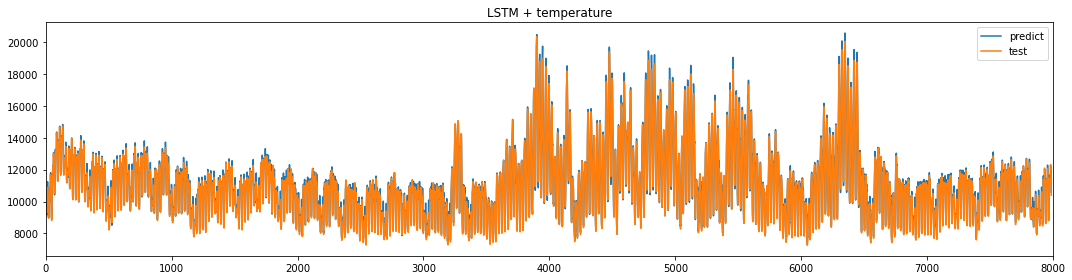

In [151]:
plt.figure(figsize=(15,4))
plt.plot(testPredict2*mystd+mymean,label='predict')
plt.plot(y_test*mystd+mymean,label='test')
plt.legend()
plt.title('LSTM + temperature')
plt.xlim(0,8000)
plt.tight_layout()
plt.savefig('forecast_LSTM.png')
plt.show()

In [146]:
rmse = np.sqrt(mean_squared_error(y_train*mystd+mymean, trainPredict2*mystd+mymean))
print(rmse)

202.28427985800965


Our data show that adding temperature as extra feature can lead to better performance. The model2 has lower rmse than model1 (202.28 versus 210.9). The trend is consistent with our ARIMA models. However, these RMSEs are higher than ARIMA model.

Bottom line - ARIMA model with temperature as exogeneous feature is the best.

Note, with limited time and resources, these LSTM models are far from optimal and the network architecture should be explored.